85-115

## [2] 사이킷런으로 시작하는 머신러닝
### 01. 사이킷런 소개와 특징
사이킷런의 특징
* 가장 파이썬스러운 API를 제공
* 머신러닝을 위한 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공
* 오랜 기간 실전 환경에서 검증됨, 매우 많은 환경에서 사용되는 성숙한 라이브러리

In [54]:
# 사이킷런 설치
!pip install scikit-learn

In [55]:
import sklearn

print(sklearn.__version__) # 사이킷런 버전 확인

1.5.2


### 02. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기
* 붓꽃(Iris) 데이터 세트로 붓꽃의 품종을 분류(Classificatioin)하기
* 꽃잎의 길이, 너비, 꽃받침의 길이, 너비 피처를 기반으로 꽃의 품종을 예측

<분류(Classification)>
- 대표적인 지도학습(Surpervised Learning) 방법의 하나
- 지도학습 : 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식
- 학습 데이터 세트 : 학습을 위해 주어진 데이터 세트
- 테스트 데이터 세트 : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트

- sklearn.datasets 내의 모듈 : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
- sklearn.tree 내의 모듈 : 트리 기반 ML 알고리즘을 구현한 클래스의 모임
- sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
- 하이퍼 파라미터 : 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파리미터들을 통칭, 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝

- 붓꽃 데이터 세트를 생성하기 : load_iris()를 이용
- 의사 결정 트리(Decision Tree) 알고리즘, 이를 구현한 DecisionTreeClassifier를 적용
- 데이터 세트를 학습 데이터와 테스트 데이터로 분리 : train_test_split() 함수 사용

In [56]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

load_iris() : 붓꽃 데이터 세트를 로딩, 피처들과 데이터 값이 어떻게 구성돼 있는지 확인하기 위해 DataFrame으로 변환

In [57]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(Feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target 값 :', iris_label)
print('iris target 명 :', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환하기
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


* 피처 : sepal length, sepal width, petal length, petal WindowsPath
* 레이블(Label, 결정값) : 0은 Setosa, 1은 versicolor, 2는 virginica

* 학습용 데이터와 테스트용 데이터 분리 (반드시 분리해야 함)
* 학스 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는 지 평가하기 위해 테스트 데이터 세트가 필요하기 때문
* trian_Test_split() : test_size() 파라미터 입력값의 비율로 테스트 데이터와 학습 데이터를 분할함

In [58]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)
# iris_data : 피처 데이터 세트
# iris_label ; 레이블(label) 데이터 세트
# test_size = 0.2 : 테스트 데이터가 20%, 학습 데이터가 80%
# random_state : 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값
# random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만듦

* 의사 결정 트리를 이용해 학습과 예측을 수행

In [59]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

* 예측 수행 : 학습 데이터가 아닌 다른 데이터를 이용해야 함, 일반적으로 테스트 데이터 세트를 이용
* predict() 매서드에 테스트용 피처 데이터 세트를 입력해 호출 : 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환

In [60]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

* 예측 결과를 기반으로 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능을 평가
* 정확도를 측정
* 정확도 : 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표
* 예측한 붓꽃 품종과 실제 테스트 데이터 세트의 붓꽃 품종이 얼마나 일치하는지 확인
* accuracy_score(실제 레이블 데이터 세트, 예측 레이블 데이터 세트) : 정확도 측정

In [61]:
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'. format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9333


[붓꽃 데이터 세트로 분류를 예측한 프로세스]
* 1. 데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리
* 2. 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킴
* 3. 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류(붓꽃 종류)를 예측
* 4. 평가 : 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가


### [3] 사이킷런의 기반 프레임워크 익히기
### [Estimator 이해 및 fit(), predict() 메서드]
* fit() : ML 모델 학습을 위해
* predict() : 학습된 모델의 예측을 위해
* Classifier : 분류 알고리즘을 구현한 클래스
* Regressor : 회귀 알고리즘을 구현한 클래스
* Estimator 클래스 : Classifier 와 Regressor를 합쳐서, 지도학습의 모든 알고리즘을 구현한 클래스를 통칭

### [사이킷런의 주요 모듈]
* 예제 데이터 : sklearn.datasets
* 피처 처리 : sklearn.preprocessing, sklearn.feature_selection, sklearn.feature_extraction
* 피처 처리 & 차원 축소 : sklearn.decomposition
* 데이터 분리, 검증 & 파라미터 튜닝 : sklearn.model_selection
* 평가 : sklearn.metrics
* ML 알고리즘 : sklearn.ensemble, sklean.linear_model, sklearn.naive_bayes, sklearn.neighbors, sklearn.svm, sklearn.tree, sklearn.cluster
* 유틸리티 : sklearn.pipeline

### [내장된 예제 데이터 세트]
[datasets 모듈]
* 회귀 용도 : datasets.load_bostorn(), datasets.load_diabetes
* 분류 용도 : datasets.load_breast_cancer(), datasets.load_digits(), datasets.load_iris()

[fetch 게열 명령] (최초 사용 시 인터넷 연결 필수)
* fetch_covtype() : 회귀 분석용 토지 조사 자료
* fetch_20newsgroups(), fetch_olivetti_faces(), fetch_lfw_people(), fetch_lfw_pairs(), fetch_rcv1(), fetch_mldata()

[분류와 클러스을 위한 표본 데이터 생성기]
* datasets.make_classifications() : 분류를 위한 데이터 세트를 만듦, 높은 상관도와 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성
* datasets.make_blobs() : 클러스터링을 위한 데이터 세트를 무작위로 생성, 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트를 쉽게 만듦

[개별 키(Key)가 가리키는 데이터 세트의 의미]
* data : 피처의 데이터 세트, ndarray
* target : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트, ndarray
* target_names : 개별 레이블의 이름, ndarray 또는 list
* feature_names : 피처의 이름, ndarray 또는 list
* DESCR : 데이터 세트에 대한 설명과 각 피처의 설명, 스트링

In [62]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


In [63]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [64]:
# load_iris()가 반환하는 객체의 키인 feature_names, target_name, data, target이 가리키는 값
print('\n feature_names의 type:', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print('datat의 shape:', len(iris_data.data))
print(iris_data['data'])

print('\n target의 type:', type(iris_data.target))
print('target의 shape:', len(iris_data.target))
print(iris_data.target)


 feature_names의 type: <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
datat의 shape: 150
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

### [04 Model Selection 모듈 소개]
### [학습/테스트 데이터 세트 분리 - train_test_split()]

* 테스트 데이터 세트를 이요하지 않고 학습 데이터 세트로만 학습하고 예측하면 발생하는 문제점

In [65]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


* 정확도 100%
* 이미 학습한 학습 데이터 세트를 기반으로 예측함
* 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야 함

train_test_split()
* 첫 번째 파라미터 : 피처 데이터 세트
* 두 번째 파라미터 : 레이블 데이터 세트
* 추가 파라미터 : test_size, train_size, shuffle, random_state

In [66]:
# 테스트 데이터 세트를 전체의 30%. 학습 데이터 세트를 70%

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, \
                                                    test_size = 0.3, random_state=121)

In [67]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


[교차 검증]
* 과적합 문제 해결 위해
* 과적합 : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것
* 교차 검증 : 데이터 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행, 각 세트에서 수행한 평가 결과에 따라 하이퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉽게 할 수 있음

#### 1) K 폴드 교차 검증
* 가장 보편적으로 사용되는 교차 검증 기법
* K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
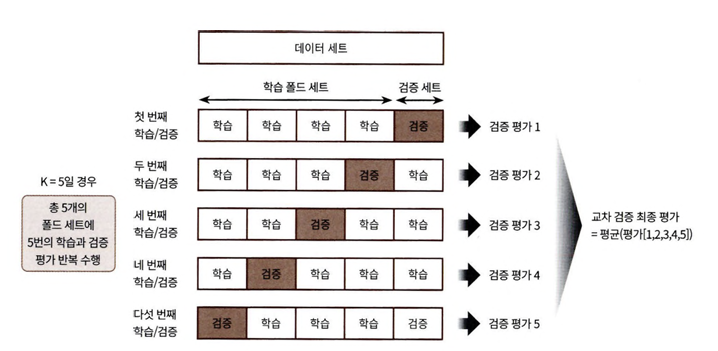

* 사이킷런에서 K 폴드 교차 검증 프로세스 구현을 위해 KFold와 StratifiedKFold 클래스를 제공

* Kfold 클래스 이용
* 붓꽃 데이터 세트와 DecisionTreeClassifier를 다시 생성, 5개의 폴드 세트로 분리하는 KFold 객체를 생성

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


* KFold(n_splits=5)로 KFold 객체를 생성, 생성된 KFold 객체의 split()을 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리
* 학습용 데이터 세트 : 120개(4/5), 검증 테스트 데이터 세트 : 30개(1/5)
* split() 호출 : 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환

In [69]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter +=1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter,accuracy,train_size,test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
#5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


#### 2) Stratified K 폴드
* 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식
* 불균형한 분포도를 가진 레이블 데이터 집합 : 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우지는 것
* K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결
* 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

In [70]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

,count
label,
0,50
1,50
2,50


In [71]:
# 이슈가 발생하는 현상 도출을 위해 3개의 폴드 세트를 KFold로 생성
# 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도를 확인
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter +=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

##교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
##교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
##교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


학습 레이블이 1,2밖에 없으므로 0의 경우는 전혀 학습하지 못함 -> 검증 예측 정확도는 0



* StratifiedKFold 사용
* 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요함

In [72]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']) :
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증:{0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증:1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증:2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증:3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당됐음

In [73]:
df_clf = DecisionTreeClassifier(random_state = 156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('n\## 교차 검증별 정확도 :', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
n\## 교차 검증별 정확도 : [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


* Stratified K 폴드 : 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있음
* 왜곡된 레이블 데이터 세트에서 반드시 사용
* 분류에서의 교차 검증 : K 폴드가 아니라 Stratified K 폴드로 분할
* 회귀에서 : Stratified K 폴드가 지원되지 않음

### 3) 교차 검증을 보다 간편하게 - cross_val_score()


```
cross_val_score(estimator, X, y=None, scoring = None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
```
* estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor
* X : 피처 데이터 세트
* y : 레이블 데이터 세트
* scoring : 예측 성능 평가 지표를 기술
* cv : 교차 검증 폴드 수
* cross_val_score() 수행 후 반환 값 : scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환
* cross_val_score()는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블값의 분포에 따라 학습/테스트 세트를 분할 (회귀인 경우 : K 폴드 방식으로 분할)



In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state = 156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### [GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에]
* 하이퍼 파라미터 : 머신러닝 알고리즘을 구성하는 주요 구성 요소, 이 값을 조정해 알고리즘의 예측 성능을 개선
* 사이킷런은 GridSearchCV API를 이용하여 Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공

In [75]:
# 결정 트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾기
# 파라미터의 집합을 만들고 이를 순차적으로 적용함녀서 최적화를 수행

grid_parameters = {'max_depth': [1, 2, 3],
                   'min_samples_split': [2, 3]}

In [76]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

#파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth': [1, 2, 3], 'min_samples_split': [1, 2, 3]}

In [77]:
import pandas as pd

#param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 우누어트테스트 수행 설정
#refit=True가 default. True이면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

In [78]:
#붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

#GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
9 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 1}",NaN,7,NaN,NaN,NaN
1,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
3,"{'max_depth': 2, 'min_samples_split': 1}",NaN,7,NaN,NaN,NaN
4,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
5,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
6,"{'max_depth': 3, 'min_samples_split': 1}",NaN,7,NaN,NaN,NaN
7,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
8,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [79]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [80]:
#GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

#GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도: 0.9667
